In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [7]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

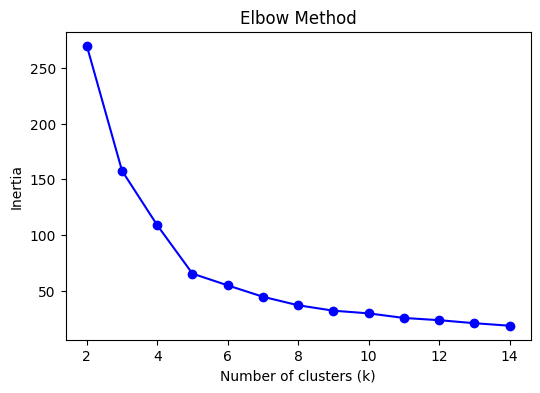

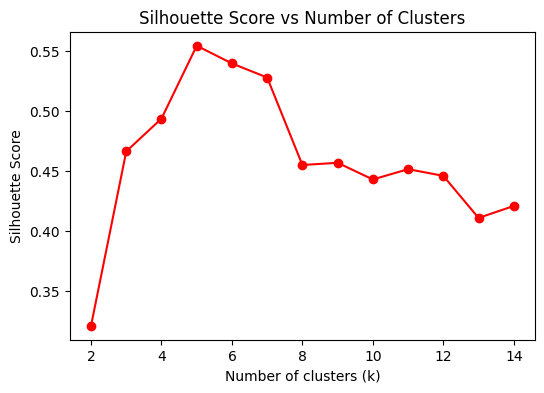

In [8]:
inertia = []
sil_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(x, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker="o", color="red")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [10]:
labels = kmeans.predict(x)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [11]:
df["Cluster"] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


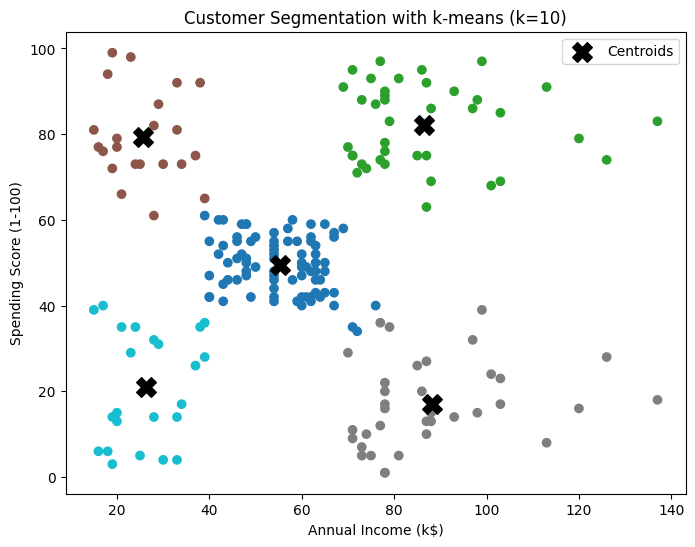


Number of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [12]:
centers = std_scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="tab10")
plt.scatter(centers[:, 0], centers[:, 1], color="black", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with k-means (k=10)")
plt.legend()
plt.show()

cluster_counts = df["Cluster"].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

In [13]:
income_mean = df["Annual Income (k$)"].mean()
score_mean = df["Spending Score (1-100)"].mean()

def label_cluster(row):
    income = row["Annual Income (k$)"]
    score = row["Spending Score (1-100)"]
    
    if income > income_mean and score > score_mean:
        return "High Income & High Spending"
    elif income > income_mean and score <= score_mean:
        return "High Income & Low Spending"
    elif income <= income_mean and score > score_mean:
        return "Low Income & High Spending"
    else:
        return "Low Income & Low Spending"

df["Label"] = df.apply(label_cluster, axis=1)
df["Label"].value_counts()

Label
High Income & Low Spending     54
Low Income & Low Spending      49
Low Income & High Spending     49
High Income & High Spending    48
Name: count, dtype: int64

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Label
0,1,Male,19,15,39,4,Low Income & Low Spending
1,2,Male,21,15,81,2,Low Income & High Spending
2,3,Female,20,16,6,4,Low Income & Low Spending
3,4,Female,23,16,77,2,Low Income & High Spending
4,5,Female,31,17,40,4,Low Income & Low Spending
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,High Income & High Spending
196,197,Female,45,126,28,3,High Income & Low Spending
197,198,Male,32,126,74,1,High Income & High Spending
198,199,Male,32,137,18,3,High Income & Low Spending


In [15]:
score = silhouette_score(x, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091
